In [2]:
pip install nba_api

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np

In [4]:
from nba_api.stats.endpoints import leaguegamefinder

In [5]:
# Pull all games from 2006-07 through 2025-26
seasons = [
    '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
    '2011-12', '2012-13', '2013-14', '2014-15', '2015-16',
    '2016-17', '2017-18', '2018-19', '2019-20', '2020-21',
    '2021-22', '2022-23', '2023-24', '2024-25', '2025-26'
]

all_games = []

for season in seasons:
    try:
        game_finder = leaguegamefinder.LeagueGameFinder(
            player_or_team_abbreviation='P', 
            season_type_nullable='Regular Season', 
            season_nullable=season
        ).get_data_frames()[0]
        all_games.append(game_finder)
        print(f"Fetched {len(game_finder)} games from {season}")
    except Exception as e:
        print(f"Error fetching {season}: {e}")

# Combine all seasons into one dataframe
game_finder = pd.concat(all_games, ignore_index=True)
print(f"\nTotal games: {len(game_finder)}")

Fetched 25086 games from 2006-07
Fetched 24886 games from 2007-08
Fetched 24886 games from 2007-08
Fetched 24629 games from 2008-09
Fetched 24629 games from 2008-09
Fetched 24813 games from 2009-10
Fetched 24813 games from 2009-10
Fetched 25153 games from 2010-11
Fetched 25153 games from 2010-11
Fetched 20758 games from 2011-12
Fetched 20758 games from 2011-12
Fetched 25757 games from 2012-13
Fetched 25757 games from 2012-13
Fetched 25618 games from 2013-14
Fetched 25618 games from 2013-14
Fetched 25981 games from 2014-15
Fetched 25981 games from 2014-15
Fetched 26078 games from 2015-16
Fetched 26078 games from 2015-16
Fetched 26139 games from 2016-17
Fetched 26139 games from 2016-17
Fetched 26107 games from 2017-18
Fetched 26107 games from 2017-18
Fetched 26101 games from 2018-19
Fetched 26101 games from 2018-19
Fetched 22393 games from 2019-20
Fetched 22393 games from 2019-20
Fetched 23054 games from 2020-21
Fetched 23054 games from 2020-21
Fetched 26039 games from 2021-22
Fetched 26

In [6]:
game_finder.to_csv('game_finder.csv', index=False)

In [7]:
game_finder = pd.read_csv('game_finder.csv')

In [8]:
game_finder.columns

Index(['SEASON_ID', 'PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS',
       'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PLUS_MINUS'],
      dtype='object')

In [9]:
columns_needed = ['SEASON_ID', 'PLAYER_ID', 'PLAYER_NAME', 'GAME_DATE', 'GAME_ID', 'MIN', 'FGA', 'FG3A', 'PTS', 'FTA']
game_finder[columns_needed]

,SEASON_ID,PLAYER_ID,PLAYER_NAME,GAME_DATE,GAME_ID,MIN,FGA,FG3A,PTS,FTA
0,22006,1891,Jason Terry,2007-04-18,20601229,20,8,3,12,0
1,22006,2696,Lynn Greer,2007-04-18,20601220,16,5,3,5,4
2,22006,1517,Bobby Jackson,2007-04-18,20601230,25,8,4,9,2
3,22006,200755,JJ Redick,2007-04-18,20601219,11,5,3,10,2
4,22006,101115,Andrew Bynum,2007-04-18,20601227,14,5,0,9,1
...,...,...,...,...,...,...,...,...,...,...
485115,22025,1630611,Gui Santos,2025-10-21,22500002,3,0,0,0,0
485116,22025,1631222,Jake LaRavia,2025-10-21,22500002,16,4,2,5,2
485117,22025,1631095,Jabari Smith Jr.,2025-10-21,22500001,42,15,6,16,0
485118,22025,1627741,Buddy Hield,2025-10-21,22500002,22,11,10,17,0


In [10]:
lebron_games = game_finder[columns_needed][game_finder['PLAYER_NAME'] == 'LeBron James']
lebron_games = lebron_games[lebron_games['PTS'] >= 10]

# Convert GAME_DATE to datetime
lebron_games['GAME_DATE'] = pd.to_datetime(lebron_games['GAME_DATE'])

# Filter for games on or after January 6, 2007
lebron_games = lebron_games[lebron_games['GAME_DATE'] >= '2007-01-06']

# Remove the game on December 4, 2025
lebron_games = lebron_games[lebron_games['GAME_DATE'] <= '2025-12-04']
len(lebron_games)

1297

In [11]:
# Calculate point opportunities: (FG3A * 3) + ((FGA - FG3A) * 2) + (FTA * 1)
lebron_games['POINT_OPPORTUNITIES'] = (lebron_games['FG3A'] * 3) + ((lebron_games['FGA'] - lebron_games['FG3A']) * 2) + (lebron_games['FTA'] * 1)

# Convert MIN to numeric (in case it's stored as string)
lebron_games['MIN'] = pd.to_numeric(lebron_games['MIN'], errors='coerce')

# Calculate mean and standard deviation for minutes
minutes_mean = lebron_games['MIN'].mean()
minutes_sd = lebron_games['MIN'].std()

# Calculate mean and standard deviation for point opportunities
point_opp_mean = lebron_games['POINT_OPPORTUNITIES'].mean()
point_opp_sd = lebron_games['POINT_OPPORTUNITIES'].std()

print("Minutes Distribution:")
print(f"  Mean: {minutes_mean:.2f}")
print(f"  SD: {minutes_sd:.2f}")
print(f"  2SD below Mean: {minutes_mean - 2 * minutes_sd:.2f}")
print(f"\nPoint Opportunities Distribution:")
print(f"  Mean: {point_opp_mean:.2f}")
print(f"  SD: {point_opp_sd:.2f}")
print(f"  2SD below Mean: {point_opp_mean - 2 * point_opp_sd:.2f}")

Minutes Distribution:
  Mean: 37.05
  SD: 4.90
  2SD below Mean: 27.25

Point Opportunities Distribution:
  Mean: 50.82
  SD: 11.85
  2SD below Mean: 27.12


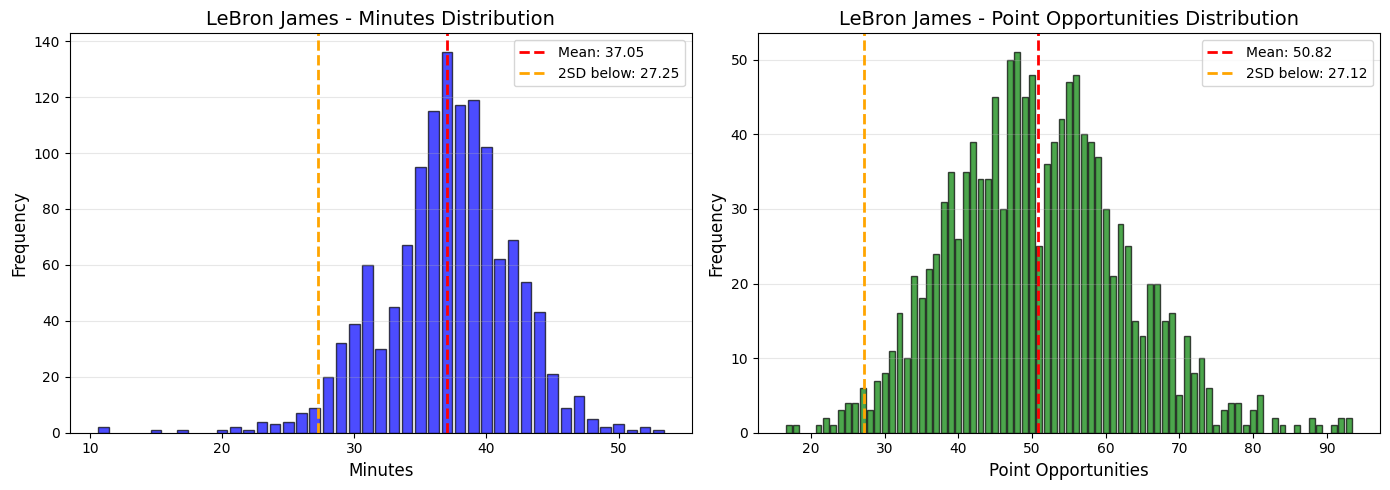

In [12]:
import matplotlib.pyplot as plt

# Create histograms for minutes and point opportunities
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Minutes histogram - one bar per unique value
min_counts = lebron_games['MIN'].value_counts().sort_index()
axes[0].bar(min_counts.index, min_counts.values, color='blue', alpha=0.7, edgecolor='black', width=0.8)
axes[0].axvline(minutes_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {minutes_mean:.2f}')
axes[0].axvline(minutes_mean - 2*minutes_sd, color='orange', linestyle='--', linewidth=2, label=f'2SD below: {minutes_mean - 2*minutes_sd:.2f}')
axes[0].set_xlabel('Minutes', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('LeBron James - Minutes Distribution', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Point Opportunities histogram - one bar per unique value
po_counts = lebron_games['POINT_OPPORTUNITIES'].value_counts().sort_index()
axes[1].bar(po_counts.index, po_counts.values, color='green', alpha=0.7, edgecolor='black', width=0.8)
axes[1].axvline(point_opp_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {point_opp_mean:.2f}')
axes[1].axvline(point_opp_mean - 2*point_opp_sd, color='orange', linestyle='--', linewidth=2, label=f'2SD below: {point_opp_mean - 2*point_opp_sd:.2f}')
axes[1].set_xlabel('Point Opportunities', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('LeBron James - Point Opportunities Distribution', fontsize=14)
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [13]:
print("Games lebron had less than thresholds:", len(lebron_games[(lebron_games['MIN'] < (minutes_mean - 2 * minutes_sd)) & (lebron_games['POINT_OPPORTUNITIES'] < (point_opp_mean - 2 * point_opp_sd))]))
print("Percentage: {:.2f}%".format((len(lebron_games[(lebron_games['MIN'] < (minutes_mean - 2 * minutes_sd)) & (lebron_games['POINT_OPPORTUNITIES'] < (point_opp_mean - 2 * point_opp_sd))]) / len(lebron_games) * 100)))

Games lebron had less than thresholds: 7
Percentage: 0.54%


In [14]:
other_games = game_finder[columns_needed][game_finder['PLAYER_ID'] != 2544]
other_games = other_games[other_games['MIN'] >= (minutes_mean - 2 * minutes_sd)]
other_games['POINT_OPPORTUNITIES'] = (other_games['FG3A'] * 3) + ((other_games['FGA'] - other_games['FG3A']) * 2) + (other_games['FTA'] * 1)
other_games = other_games[other_games['POINT_OPPORTUNITIES'] >= (point_opp_mean - 2 * point_opp_sd)]
print("Total games:", len(other_games))
print("Games with at least 10 points:", len(other_games[other_games['PTS'] >= 10]))
print("Percentage of games with at least 10 points: {:.2f}%".format((len(other_games[other_games['PTS'] >= 10]) / len(other_games) * 100)))
print("Percentage of this happening 1,297 times in a row: {:.25f}%".format((len(other_games[other_games['PTS'] >= 10]) / len(other_games)) ** 1297 * 100))

Total games: 119196
Games with at least 10 points: 114413
Percentage of games with at least 10 points: 95.99%
Percentage of this happening 1,297 times in a row: 0.0000000000000000000008534%


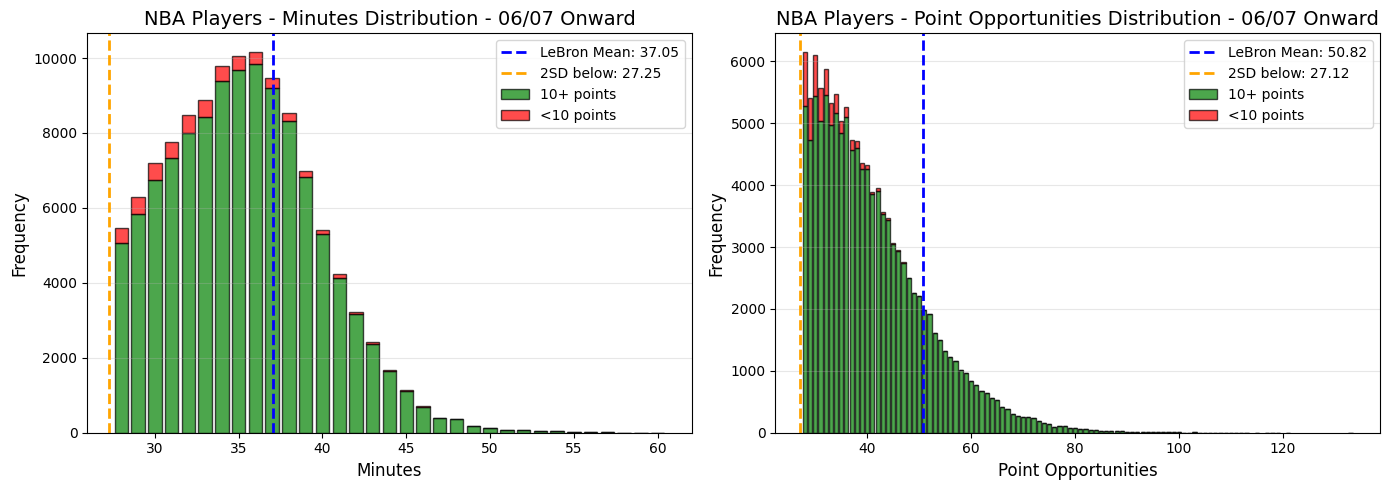

In [15]:
# Create histograms for other_games with split by 10+ points
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Split other_games by whether they scored 10+ points
other_games_10plus = other_games[other_games['PTS'] >= 10]
other_games_less10 = other_games[other_games['PTS'] < 10]

# Minutes histogram - split by 10+ points
min_counts_10plus = other_games_10plus['MIN'].value_counts().sort_index()
min_counts_less10 = other_games_less10['MIN'].value_counts().sort_index()

# Get all unique minutes values
all_mins = sorted(set(min_counts_10plus.index.tolist() + min_counts_less10.index.tolist()))

# Reindex to ensure all values are present
min_counts_10plus = min_counts_10plus.reindex(all_mins, fill_value=0)
min_counts_less10 = min_counts_less10.reindex(all_mins, fill_value=0)

axes[0].bar(all_mins, min_counts_10plus.values, color='green', alpha=0.7, edgecolor='black', width=0.8, label='10+ points')
axes[0].bar(all_mins, min_counts_less10.values, bottom=min_counts_10plus.values, color='red', alpha=0.7, edgecolor='black', width=0.8, label='<10 points')
axes[0].axvline(minutes_mean, color='blue', linestyle='--', linewidth=2, label=f'LeBron Mean: {minutes_mean:.2f}')
axes[0].axvline(minutes_mean - 2*minutes_sd, color='orange', linestyle='--', linewidth=2, label=f'2SD below: {minutes_mean - 2*minutes_sd:.2f}')
axes[0].set_xlabel('Minutes', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('NBA Players - Minutes Distribution - 06/07 Onward', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Point Opportunities histogram - split by 10+ points
po_counts_10plus = other_games_10plus['POINT_OPPORTUNITIES'].value_counts().sort_index()
po_counts_less10 = other_games_less10['POINT_OPPORTUNITIES'].value_counts().sort_index()

# Get all unique point opportunities values
all_pos = sorted(set(po_counts_10plus.index.tolist() + po_counts_less10.index.tolist()))

# Reindex to ensure all values are present
po_counts_10plus = po_counts_10plus.reindex(all_pos, fill_value=0)
po_counts_less10 = po_counts_less10.reindex(all_pos, fill_value=0)

axes[1].bar(all_pos, po_counts_10plus.values, color='green', alpha=0.7, edgecolor='black', width=0.8, label='10+ points')
axes[1].bar(all_pos, po_counts_less10.values, bottom=po_counts_10plus.values, color='red', alpha=0.7, edgecolor='black', width=0.8, label='<10 points')
axes[1].axvline(point_opp_mean, color='blue', linestyle='--', linewidth=2, label=f'LeBron Mean: {point_opp_mean:.2f}')
axes[1].axvline(point_opp_mean - 2*point_opp_sd, color='orange', linestyle='--', linewidth=2, label=f'2SD below: {point_opp_mean - 2*point_opp_sd:.2f}')
axes[1].set_xlabel('Point Opportunities', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('NBA Players - Point Opportunities Distribution - 06/07 Onward', fontsize=14)
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [23]:
import random

# Optimized function using vectorized operations
def find_min_point_opps_fast(min_val, po_val, df):
    # Create boolean masks for matching
    min_match = df['MIN'].between(min_val - 1, min_val + 1)
    po_match = df['POINT_OPPORTUNITIES'].between(po_val - 1, po_val + 1)
    matches = df[min_match & po_match]
    
    if len(matches) > 0:
        # Get first match
        idx = matches.index[0]
        scored_10 = matches.iloc[0]['PTS'] >= 10
        # Drop the matched row
        df = df.drop(idx)
        return (df, scored_10)
    
    return (df, None)

# Pre-convert to numpy arrays for faster sampling
lebron_mins = lebron_games['MIN'].values
lebron_pos = lebron_games['POINT_OPPORTUNITIES'].values

# Reset index for better performance
other_games_optimized = other_games.reset_index(drop=True)
lebron_games_optimized = lebron_games[(lebron_games['MIN'] < (minutes_mean - 2 * minutes_sd)) & (lebron_games['POINT_OPPORTUNITIES'] < (point_opp_mean - 2 * point_opp_sd))].reset_index(drop=True)

success_count = 0
streak_lengths = []

for i in range(1000):
    if i % 100 == 0:  # Print progress less frequently
        print("Simulation: {}".format(i + 1))
    
    other_games_copy = other_games_optimized.copy()
    streak_broken = False
    streak_length = 0
    
    for j in range(1297):
        min_sample = np.random.choice(lebron_mins)
        po_sample = np.random.choice(lebron_pos)
        other_games_copy, scored_10 = find_min_point_opps_fast(min_sample, po_sample, other_games_copy)
        
        if scored_10 is None:
            j -= 1# No match found - this shouldn't happen often with the thresholds
            continue
        elif not scored_10:
            if i % 100 == 0:
                print("  Failed at game {}".format(j + 1))
            streak_length = j + 1
            streak_broken = True
            break
        elif j == 1296:
            streak_length = 1297
    
    streak_lengths.append(streak_length)
    
    if not streak_broken:
        success_count += 1
        if i % 100 == 0:
            print("  Success! Scored at least 10 points in all 1,297 games.")

print("\n" + "="*50)
print("FINAL RESULTS:")
print(f"Successful streaks: {success_count} out of 1000")
print(f"Success rate: {success_count/10:.1f}%")
print(f"Mean streak length: {np.mean(streak_lengths):.2f} games")
print(f"Median streak length: {np.median(streak_lengths):.2f} games")
print(f"Max streak length: {max(streak_lengths)} games")
print("="*50)

Simulation: 1
  Failed at game 21
  Failed at game 21
Simulation: 101
Simulation: 101
  Failed at game 58
  Failed at game 58
Simulation: 201
Simulation: 201
  Failed at game 95
  Failed at game 95
Simulation: 301
Simulation: 301
  Failed at game 12
  Failed at game 12
Simulation: 401
Simulation: 401
  Failed at game 70
  Failed at game 70
Simulation: 501
Simulation: 501
  Failed at game 177
  Failed at game 177
Simulation: 601
Simulation: 601
  Failed at game 86
  Failed at game 86
Simulation: 701
Simulation: 701
  Failed at game 79
  Failed at game 79
Simulation: 801
Simulation: 801
  Failed at game 231
  Failed at game 231
Simulation: 901
Simulation: 901
  Failed at game 245
  Failed at game 245

FINAL RESULTS:
Successful streaks: 0 out of 1000
Success rate: 0.0%
Mean streak length: 87.15 games
Median streak length: 75.00 games
Max streak length: 321 games

FINAL RESULTS:
Successful streaks: 0 out of 1000
Success rate: 0.0%
Mean streak length: 87.15 games
Median streak length: 75.00

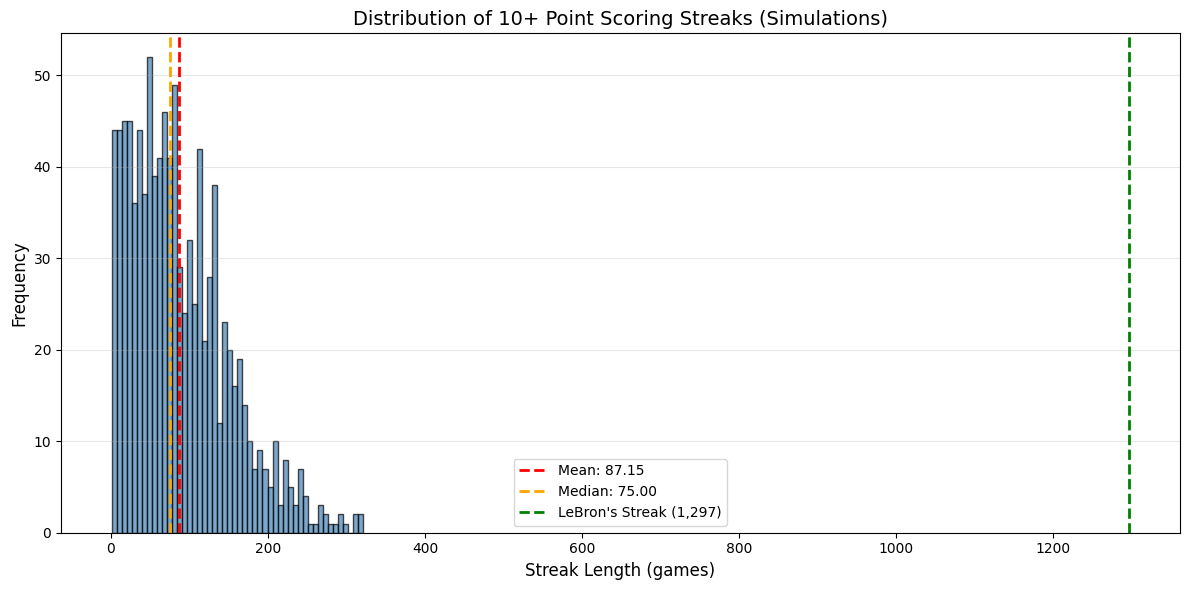

In [24]:
# Create histogram of streak lengths
plt.figure(figsize=(12, 6))
plt.hist(streak_lengths, bins=50, color='steelblue', alpha=0.7, edgecolor='black')
plt.axvline(np.mean(streak_lengths), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(streak_lengths):.2f}')
plt.axvline(np.median(streak_lengths), color='orange', linestyle='--', linewidth=2, label=f'Median: {np.median(streak_lengths):.2f}')
plt.axvline(1297, color='green', linestyle='--', linewidth=2, label='LeBron\'s Streak (1,297)')
plt.xlabel('Streak Length (games)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of 10+ Point Scoring Streaks (Simulations)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [ ]:
from nba_api.stats.endpoints import playergamestreakfinder
over_10_streak = playergamestreakfinder.PlayerGameStreakFinder(gt_pts_nullable=10, min_games_nullable=50, season_type_nullable='Regular Season').get_data_frames()[0]
print(len(over_10_streak))

100


In [49]:
active_streaks = over_10_streak[over_10_streak['ACTIVESTREAK'] == 'Y'].head(10).copy()
print(len(active_streaks))

0


In [17]:
over_10_streak.columns

Index(['PLAYER_NAME_LAST_FIRST', 'PLAYER_ID', 'GAMESTREAK', 'STARTDATE',
       'ENDDATE', 'ACTIVESTREAK', 'NUMSEASONS', 'LASTSEASON', 'FIRSTSEASON',
       'PTS', 'PTS_PG'],
      dtype='object')

In [29]:
# Select and display top 10 streaks
top_10_streaks = over_10_streak[['PLAYER_NAME_LAST_FIRST', 'GAMESTREAK', 'STARTDATE', 'ENDDATE', 'ACTIVESTREAK']].head(10).copy()

active_streaks = over_10_streak[over_10_streak['ACTIVESTREAK'] == 'Y'].head(10).copy()

# Rename columns for better presentation
top_10_streaks.columns = ['Player', 'Games', 'Start Date', 'End Date', 'Active']
active_streaks.columns = ['Player', 'Games', 'Start Date', 'End Date', 'Active']

# Reset index to show ranking
top_10_streaks.index = range(1, 11)
top_10_streaks.index.name = 'Rank'

print("=" * 90)
print("Top 10 Longest 10+ Point Scoring Streaks in NBA History")
print("=" * 90)
print(top_10_streaks.to_string())
print("=" * 90)

Top 10 Longest 10+ Point Scoring Streaks in NBA History
                    Player  Games           Start Date             End Date  Active
Rank                                                                               
1            James, LeBron   1297  2007-01-06T00:00:00  2025-12-01T00:00:00       0
2          Jordan, Michael    866  1986-03-25T00:00:00  2001-12-26T00:00:00       0
3             Malone, Karl    575  1991-12-18T00:00:00  1999-03-26T00:00:00       0
4            Durant, Kevin    562  2009-03-14T00:00:00  2017-02-27T00:00:00       0
5            Harden, James    450  2015-02-20T00:00:00  2021-03-31T00:00:00       0
6           Garnett, Kevin    411  2002-10-30T00:00:00  2007-11-27T00:00:00       0
7           Garnett, Kevin    338  1997-10-31T00:00:00  2002-02-03T00:00:00       0
8     Abdul-Jabbar, Kareem    329  1983-10-28T00:00:00  1987-12-02T00:00:00       0
9            Mullin, Chris    301  1989-03-27T00:00:00  1993-02-04T00:00:00       0
10           Durant,

Table images saved:
  - top_10_streaks_table.png (300 DPI)
  - top_10_streaks_table.pdf (vector format)


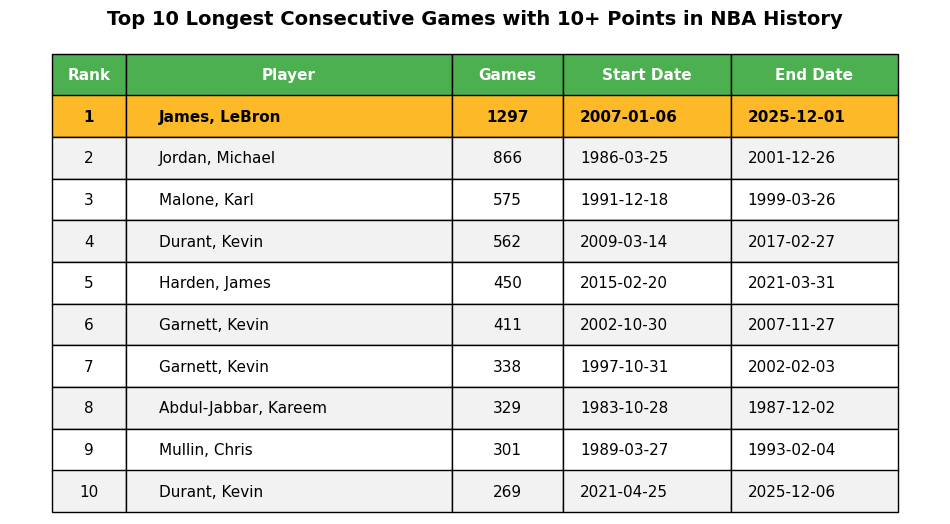

In [30]:
# Create a publication-quality table image
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('tight')
ax.axis('off')

# Create table
table_data = []
for idx, row in top_10_streaks.iterrows():
    # Convert datetime strings to just date format (YYYY-MM-DD)
    start_date = row['Start Date'][:10] if isinstance(row['Start Date'], str) else row['Start Date'].strftime('%Y-%m-%d')
    end_date = row['End Date'][:10] if isinstance(row['End Date'], str) else row['End Date'].strftime('%Y-%m-%d')
    table_data.append([idx, row['Player'], row['Games'], start_date, end_date])

table = ax.table(cellText=table_data, 
                colLabels=['Rank', 'Player', 'Games', 'Start Date', 'End Date'],
                cellLoc='left',
                loc='center',
                colWidths=[0.08, 0.35, 0.12, 0.18, 0.18])

table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2.5)

# Style the header
for i in range(5):
    cell = table[(0, i)]
    cell.set_facecolor('#4CAF50')
    cell.set_text_props(weight='bold', color='white', ha='center')

# Style alternating rows
for i in range(1, len(table_data) + 1):
    for j in range(5):
        cell = table[(i, j)]
        if i % 2 == 0:
            cell.set_facecolor('#f2f2f2')
        # Center rank and games columns
        if j in [0, 2]:
            cell.set_text_props(ha='center')

# Highlight LeBron's row (should be rank 1)
for j in range(5):
    cell = table[(1, j)]
    cell.set_facecolor('#FDB927')
    cell.set_text_props(weight='bold')

plt.title('Top 10 Longest Consecutive Games with 10+ Points in NBA History', 
          fontsize=14, fontweight='bold', pad=20)

# Save as high-resolution image
plt.savefig('top_10_streaks_table.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.savefig('top_10_streaks_table.pdf', dpi=300, bbox_inches='tight', facecolor='white')

print("Table images saved:")
print("  - top_10_streaks_table.png (300 DPI)")
print("  - top_10_streaks_table.pdf (vector format)")
plt.show()